In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import numpy as np
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('../Dados/processed/df_prophet.csv')

df.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [10]:
df = df.groupby('ds')['y'].sum().reset_index()
df

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [11]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(df)
futuro = modelo.make_future_dataframe(periods=90, freq='D')

previsao = modelo.predict(futuro)
    

17:07:34 - cmdstanpy - INFO - Chain [1] start processing
17:07:35 - cmdstanpy - INFO - Chain [1] done processing


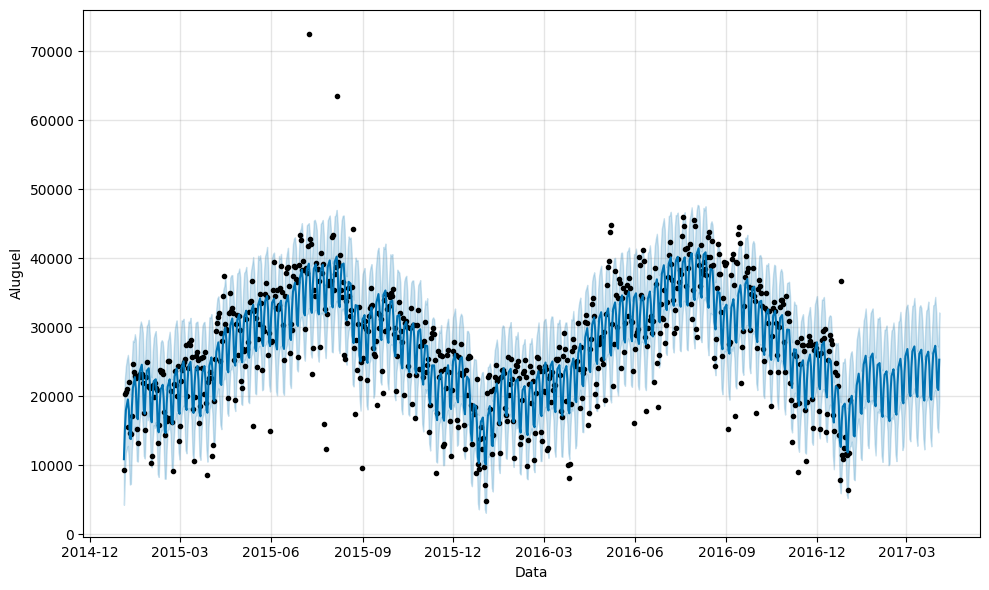

In [13]:
fig1 = modelo.plot(previsao, xlabel='Data', ylabel='Aluguel') 

In [17]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10867.436698,4248.681464,17121.906796
1,2015-01-05,15279.441783,8890.570729,22594.402077
2,2015-01-06,17984.434533,11808.797686,24375.208227
3,2015-01-07,18716.667970,12325.180844,25327.444016
4,2015-01-08,19529.925007,12793.113904,25988.199728
...,...,...,...,...
815,2017-03-30,27303.158028,20890.868485,34391.306911
816,2017-03-31,25530.545826,19354.636545,32029.859379
817,2017-04-01,21214.278115,15449.716281,27696.529702
818,2017-04-02,20897.149453,14749.799059,27208.615968


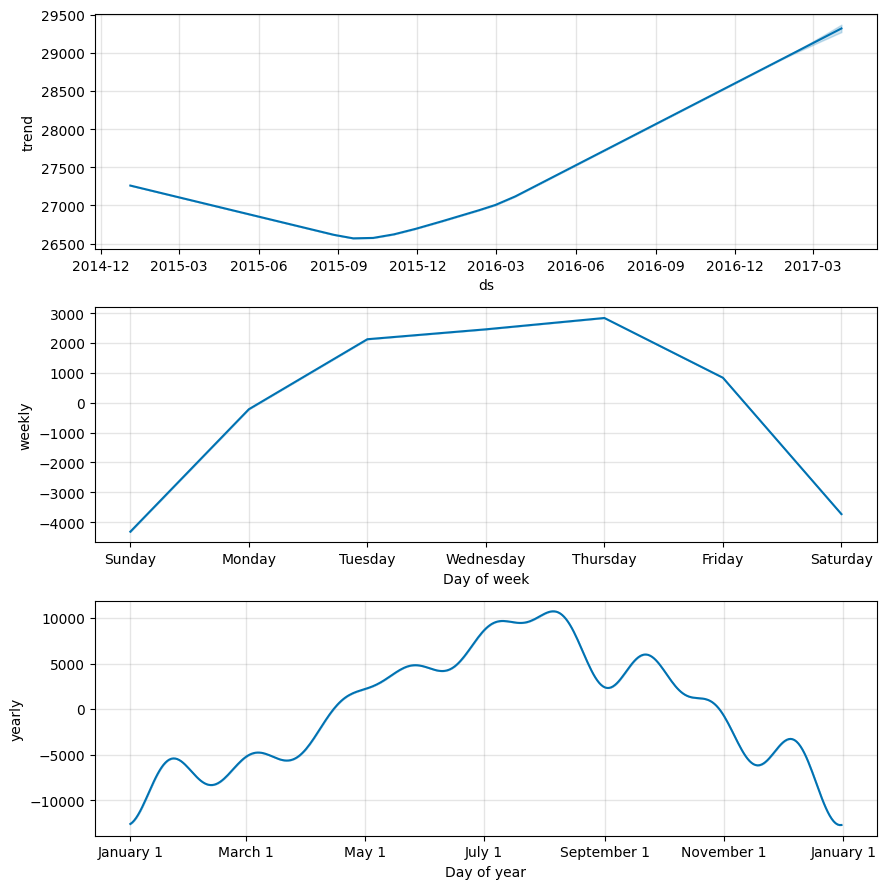

In [ ]:
fig2 = modelo.plot_components(previsao)
# fig2.savefig('componentes.png', bbox_inches='tight')


### Separando os dados em treino e teste

In [22]:
df.shape

(730, 2)

In [23]:
df_treino = pd.DataFrame()

df_treino['ds'] = df['ds'][:584]
df_treino['y'] = df['y'][:584]

In [24]:
df_teste = pd.DataFrame()

df_teste['ds'] = df['ds'][584:]
df_teste['y'] = df['y'][584:]

In [25]:
np.random.seed(4587)

modelo = Prophet()

modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

17:32:53 - cmdstanpy - INFO - Chain [1] start processing
17:32:53 - cmdstanpy - INFO - Chain [1] done processing


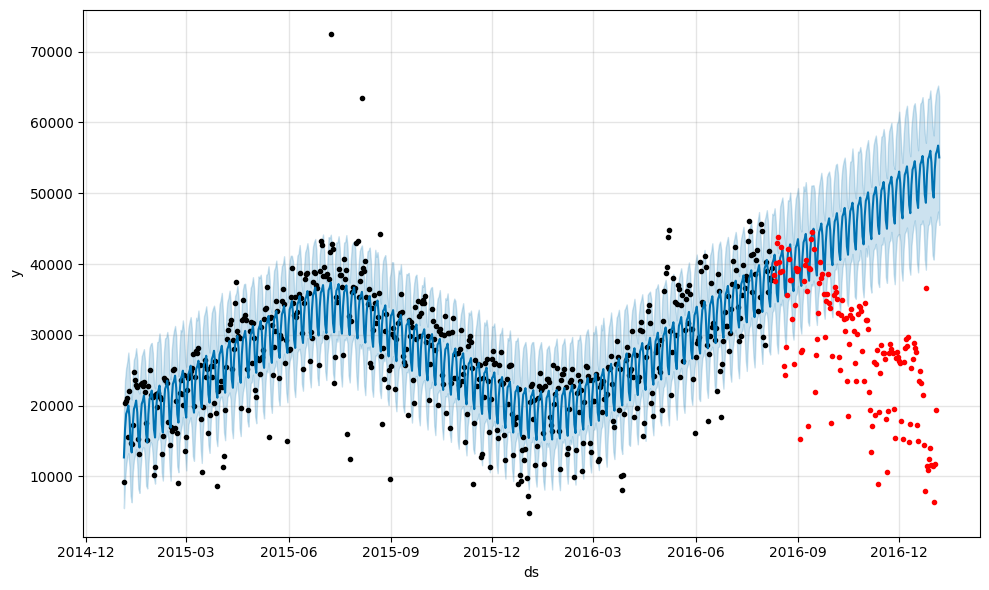

In [ ]:
fig1 = modelo.plot(previsao)

# Garante que a coluna de datas está no formato correto
df_teste['ds'] = pd.to_datetime(df_teste['ds'])

# Agora plota os dados reais em vermelho
plt.plot(df_teste['ds'], df_teste['y'], '.r')
plt.show()



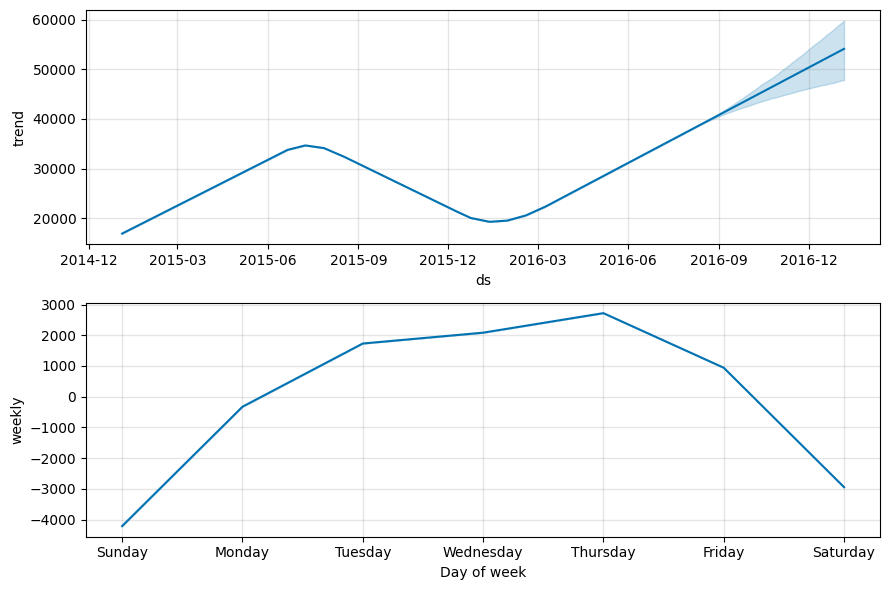

In [35]:
fig2 = modelo.plot_components(previsao)

In [38]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')

df_comparacao

,ds,yhat,y
0,2016-08-10,40578.718163,38430
1,2016-08-11,41319.073556,37626
2,2016-08-12,39648.849935,40159
3,2016-08-13,35867.643110,43041
4,2016-08-14,34706.462122,43848
...,...,...,...
141,2016-12-30,54329.197100,11566
142,2016-12-31,50547.990274,11424
143,2017-01-01,49386.809286,6421
144,2017-01-02,53373.710583,11823


In [39]:
from sklearn.metrics import  mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')


MSE: 461012998.29720056, RMSE: 21471.21324697793


In [44]:
np.random.seed(4587)

modelo = Prophet(
    yearly_seasonality=True
)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150, freq='D')
previsao = modelo.predict(futuro)

18:07:17 - cmdstanpy - INFO - Chain [1] start processing
18:07:17 - cmdstanpy - INFO - Chain [1] done processing


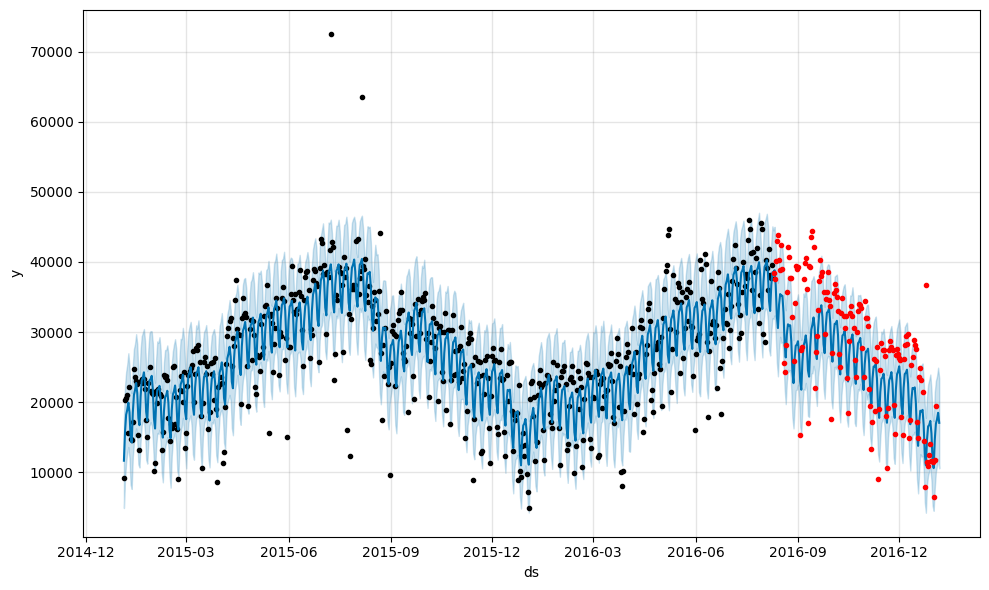

In [45]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

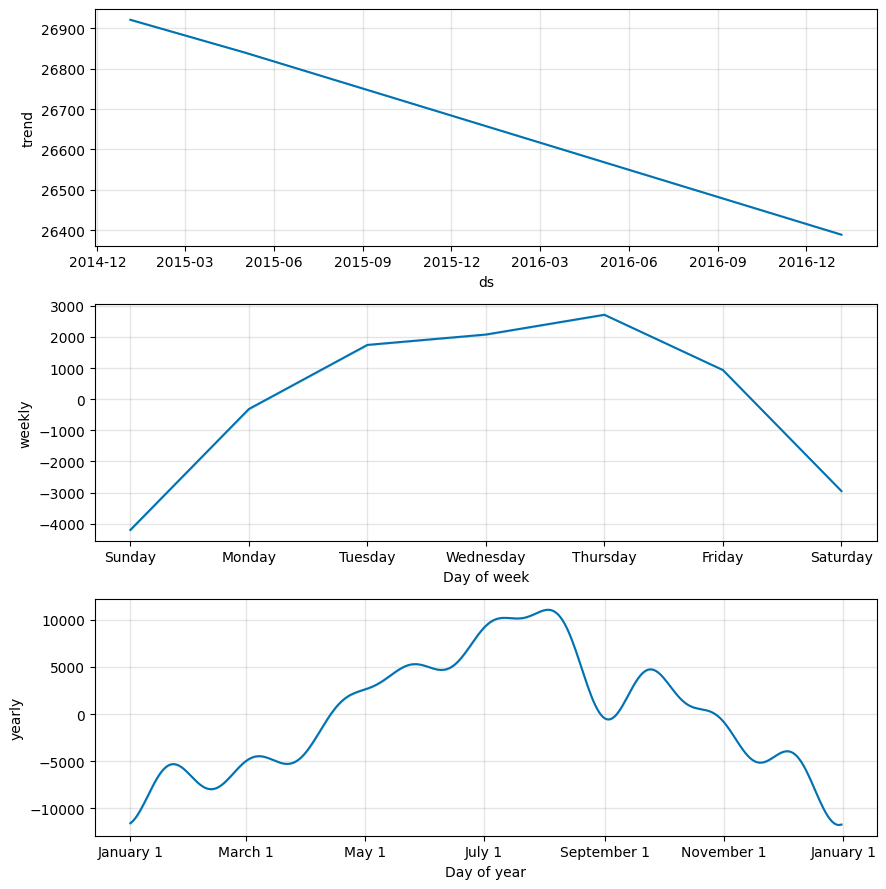

In [46]:
fig2 = modelo.plot_components(previsao)

In [ ]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38535.991663,38430
1,2016-08-11,38820.212318,37626
2,2016-08-12,36645.867170,40159
3,2016-08-13,32314.809863,43041
4,2016-08-14,30575.120022,43848
...,...,...,...
141,2016-12-30,15566.419734,11566
142,2016-12-31,11741.513975,11424
143,2017-01-01,10608.947909,6421
144,2017-01-02,14663.372319,11823


In [48]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 38023258.39534487, RMSE: 6166.3002193653265


### Tratando os outliers

In [49]:
df 

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [50]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)


18:15:31 - cmdstanpy - INFO - Chain [1] start processing
18:15:31 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
sem_outliers = df[(df['y'] > previsao['yhat_lower']) & (df['y'] < previsao['yhat_upper'])]

In [54]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [56]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

In [59]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)


18:25:34 - cmdstanpy - INFO - Chain [1] start processing
18:25:34 - cmdstanpy - INFO - Chain [1] done processing


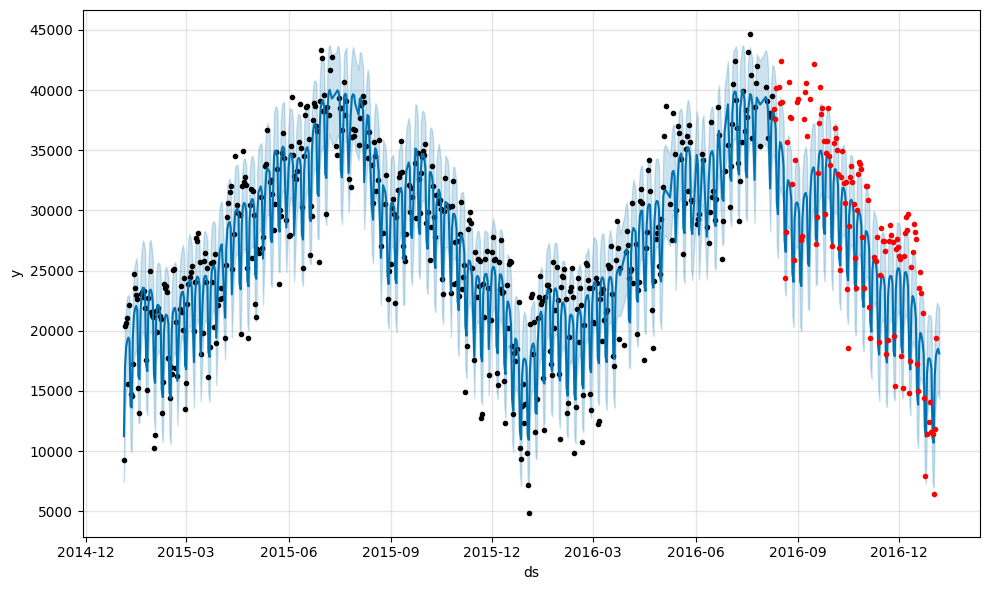

In [62]:
fig1 = modelo_sem_outliers.plot(previsao)

df_teste['ds'] = pd.to_datetime(df_teste['ds'])

plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [63]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38158.491516,38430
1,2016-08-11,37743.680499,37626
2,2016-08-12,36700.553377,40159
3,2016-08-15,34731.615970,40236
4,2016-08-16,35674.240835,38911
...,...,...,...
121,2016-12-30,16811.793881,11566
122,2016-12-31,11106.021022,11424
123,2017-01-01,10688.005959,6421
124,2017-01-02,16296.279237,11823


In [64]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 15478875.733726533, RMSE: 3934.3202378208275


In [65]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)

modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)


18:34:14 - cmdstanpy - INFO - Chain [1] start processing
18:34:14 - cmdstanpy - INFO - Chain [1] done processing


In [66]:
from prophet.plot import plot_plotly

In [67]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()